# Linear & Quadratic Approximation – Local Tangent and Parabola Fit

This notebook demonstrates **Linear and Quadratic Approximations**  
for a simple function to show how local Taylor expansions work.

---

## What is Local Approximation?

- **Linear Approximation** (1st-order) uses the tangent line to estimate a function near a point.
- **Quadratic Approximation** (2nd-order) adds curvature by including the second derivative.

These approximations are local: they become less accurate as you move away from the expansion point.

---

## What do we do in this notebook?

-  Use **`sympy`** to:
  - Compute $f(x)$, $f'(x)$, $f''(x)$
  - Write the 1st-order and 2nd-order Taylor expansions.

-  Use **`numpy`** to:
  - Evaluate the function and approximations numerically near the chosen point.

-  Use **`matplotlib`** to:
  - Plot the original function, the tangent line, and the quadratic curve together.
  - Visually verify how well each fits near the expansion point.

---

## Requirements

- `numpy`
- `sympy`
- `matplotlib`

---

## Goal

By the end of this notebook you should:
- See how the local tangent line approximates the function.
- See how adding the second derivative improves the local fit.
- Understand how Taylor expansions link derivatives to local shape.


In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [8]:
x = sp.Symbol('x')
a = sp.pi/4
f = sp.cos(x)
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)
linear_approx = f.subs(x, a) + f_prime.subs(x, a)*(x - a)
quadratic_approx = linear_approx + f_double_prime.subs(x, a)/2 * (x - a)**2

print("f(x) =", f)
print("f'(x) =", f_prime)
print("f''(x) =", f_double_prime)
print("Linear Approx:", linear_approx)
print("Quadratic Approx:", quadratic_approx)

f(x) = cos(x)
f'(x) = -sin(x)
f''(x) = -cos(x)
Linear Approx: -sqrt(2)*(x - pi/4)/2 + sqrt(2)/2
Quadratic Approx: -sqrt(2)*(x - pi/4)**2/4 - sqrt(2)*(x - pi/4)/2 + sqrt(2)/2


In [9]:
f_func = sp.lambdify(x, f, modules=['numpy'])
linear_func = sp.lambdify(x, linear_approx, modules=['numpy'])
quadratic_func = sp.lambdify(x, quadratic_approx, modules=['numpy'])

In [13]:
a_numeric = np.pi/4
x_vals = np.linspace(a_numeric - 0.5, a_numeric + 0.5, 400)
y_vals = f_func(x_vals)
y_linear = linear_func(x_vals)
y_quadratic = quadratic_func(x_vals)

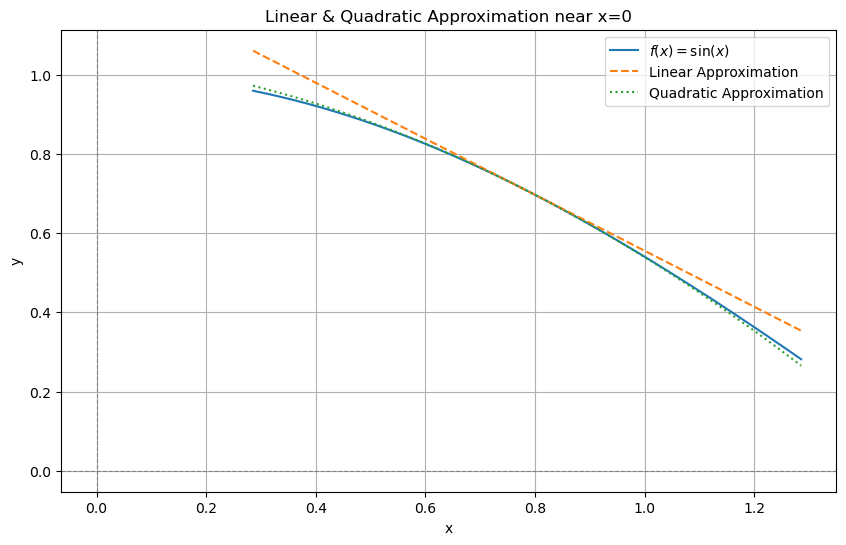

In [14]:
plt.figure(figsize=(10, 6))

plt.plot(x_vals, y_vals, label=r'$f(x) = \sin(x)$')
plt.plot(x_vals, y_linear, '--', label='Linear Approximation')
plt.plot(x_vals, y_quadratic, ':', label='Quadratic Approximation')

plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

plt.title('Linear & Quadratic Approximation near x=0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation: What to Check after Plotting

After plotting the original function together with its Linear and Quadratic Approximations, check the following points to confirm that your local Taylor expansions behave as expected:

---

### 1️. Intersection at Expansion Point  
- The original function, Linear Approximation, and Quadratic Approximation **must intersect** at the expansion point \( x = a \).
- This ensures that both approximations match the function value at \( a \).

---

### 2️. Tangent Line (1st Order)  
- The Linear Approximation (tangent line) should have the same **slope** as the original function at \( x = a \).
- It will deviate linearly as you move away from \( a \).

---

### 3️. Quadratic Fit (2nd Order)  
- The Quadratic Approximation should match both the **slope and curvature** at \( x = a \).
- This makes it fit the original function better in the neighborhood around \( a \) than the linear approximation alone.

---

### 4️. Local Validity  
- As you move further from \( x = a \), the approximation accuracy decreases.
- Confirm that the plotted interval stays close enough to the expansion point to show the intended behavior.

---

### 5️. Smoothness & Consistency  
- All curves should be smooth and continuous.
- Any unexpected jumps or rough edges may indicate an error in your symbolic expression or numeric substitution.

---

## Final Check

If all these conditions hold:
- The symbolic derivatives were correctly substituted into the Taylor expansion.
- The numerical plots align with the expected local shape.
- You clearly see how adding more derivative information (higher order) improves local accuracy.

**Key takeaway:**  
Taylor expansions connect local derivative information to global curve shape in a controllable way.
